# Exercises

## 'iris' Dataset Exercises

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
iris = sns.load_dataset('iris')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'Distribution of Petal Lengths')

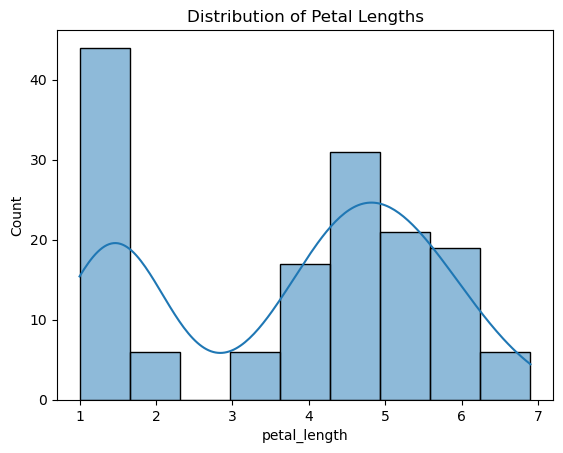

In [180]:
# What does the distribution of petal lengths look like?

sns.histplot(iris['petal_length'], kde=True)
plt.title('Distribution of Petal Lengths')

Yes. The correlation is 0.96.


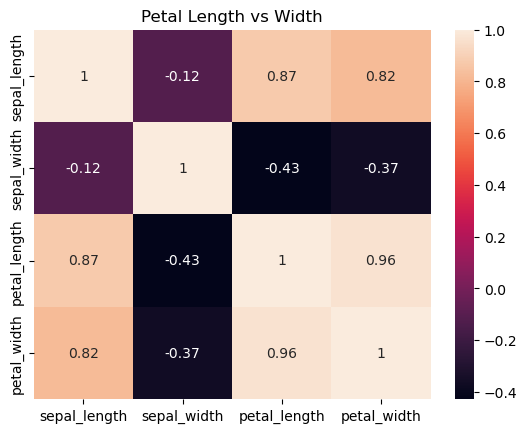

In [179]:
# Is there a relationship between petal length and petal width?

# Drop the 'species' column
iris_no_species = iris.drop('species', axis=1)

# Plot the correlation matrix
sns.heatmap(iris_no_species.corr(), annot=True)

plt.title('Petal Length vs Width')

print('Yes. The correlation is 0.96.')

No it would not be reasonable to accurately predict due to too much overlap between species.


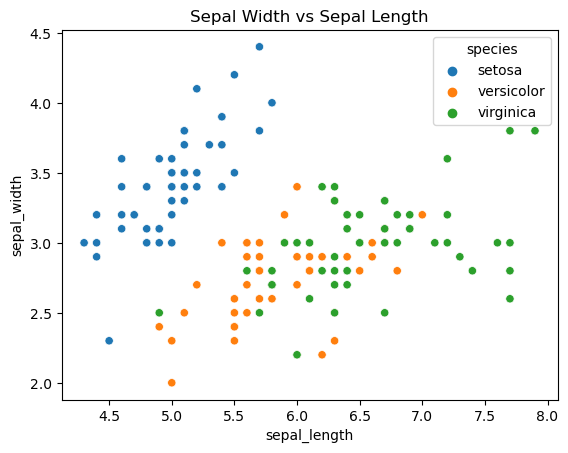

In [178]:
# Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.

# Create a facetgrid containing each of the species
# species = sns.FacetGrid(iris, col='species')

# Use .map to apply a scatter plot to each subset in species
# species.map(sns.scatterplot, 'sepal_width', 'sepal_length')

sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Width vs Sepal Length')

print('No it would not be reasonable to accurately predict due to too much overlap between species.')

The petal length to petal width seems to have the least overlap between species so it would be the best to differentiate species.


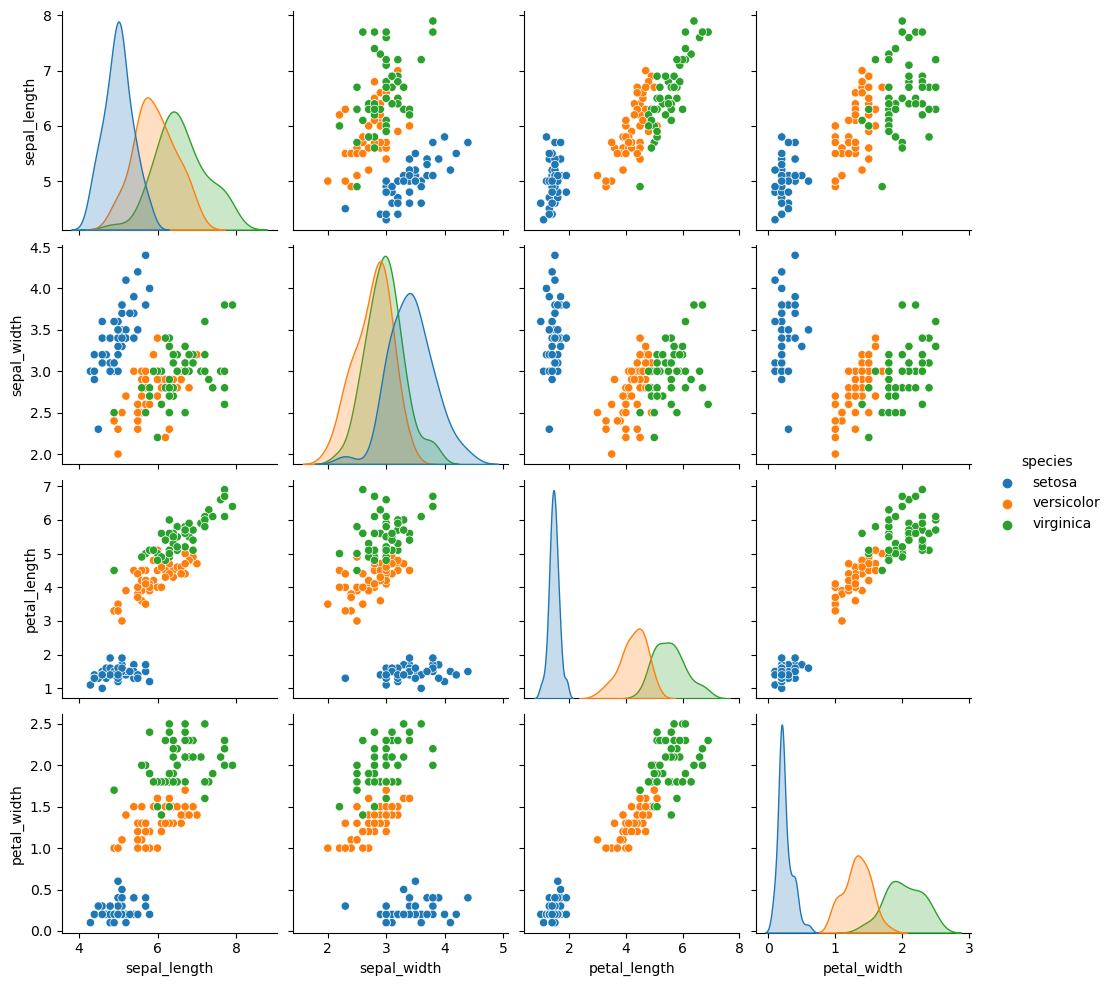

In [177]:
# Which features would be best used to predict species?

sns.pairplot(iris, hue='species')

print('The petal length to petal width seems to have the least overlap between species so it would be the best to differentiate species.')

## 'anscombe' Dataset from seaborn Exercises

In [149]:
# Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?

ans = sns.load_dataset('anscombe')

print(ans.groupby('dataset').describe())

print('They all are able to have the same average and std while having different numbers/orders.')

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  
They all are able to have the same average and std while having different numbers/orders.


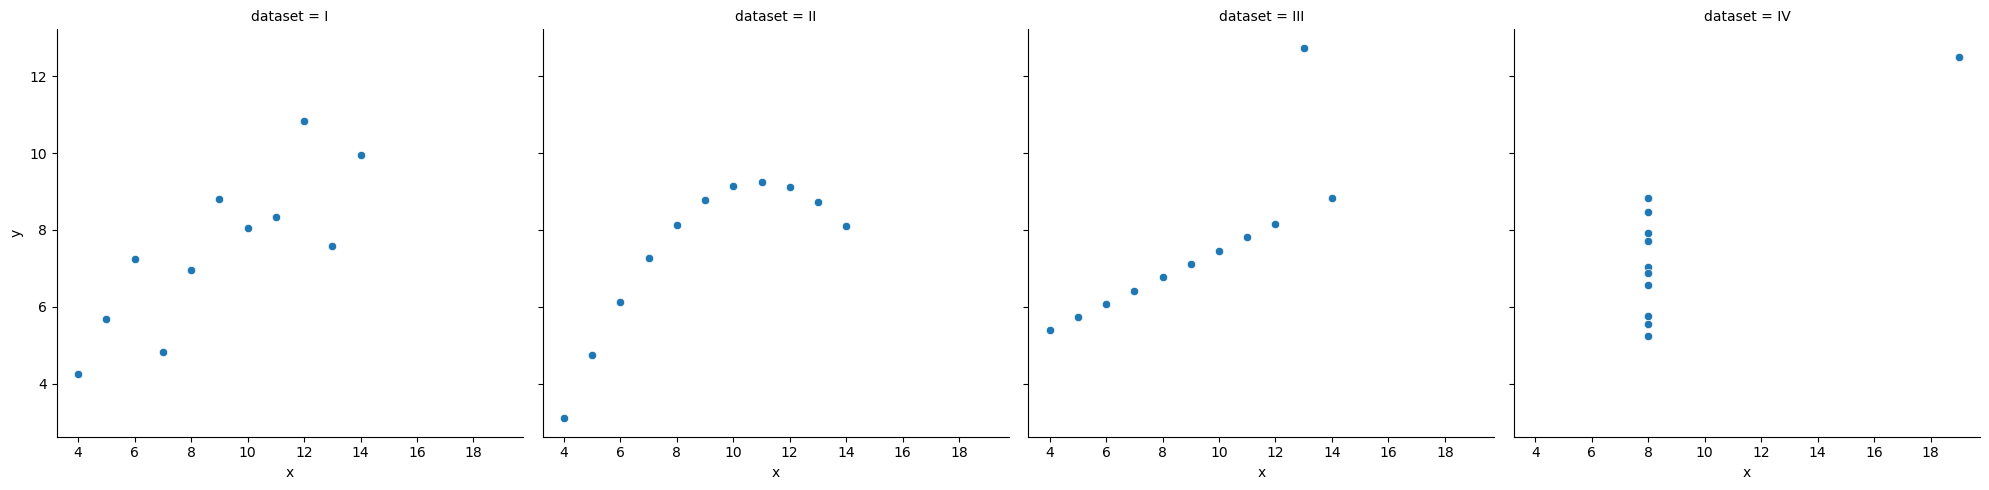

In [150]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data=ans, x='x', y='y', col='dataset')

plt.show()

## 'InsectSprays' pydataset Exercises

Text(0, 0.5, 'insect count')

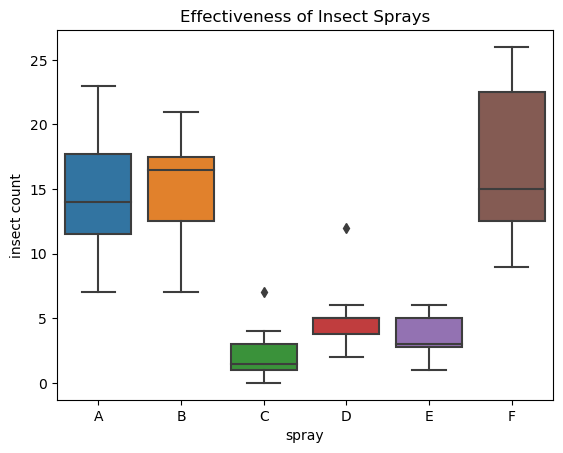

In [185]:
# Create a boxplot that shows the effectiveness of the different insect sprays

from pydataset import data

sprays = data('InsectSprays')

plt.title('Effectiveness of Insect Sprays')
sns.boxplot(data=sprays, y='count', x='spray')
plt.ylabel('insect count')

In [182]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

## 'swiss' from pydataset Exercises

In [153]:
swiss = data('swiss')

In [154]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss['is_catholic'] = swiss['Catholic'] > 51

swiss.head(1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False


The correlation is the highest out of all of the variables, but it is still only 0.5 which isnt a strong correlation.


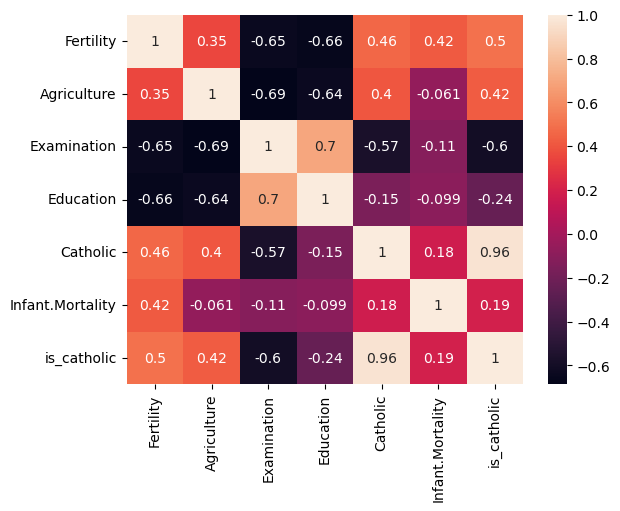

In [174]:
# Does whether or not a province is Catholic influence fertility?

# sns.relplot(x="Fertility", y="is_catholic", data=swiss)
sns.heatmap(swiss.corr(), annot=True)

print('The correlation is the highest out of all of the variables, but it is still only 0.5 which isnt a strong correlation.')

Catholic has the highest correlation.


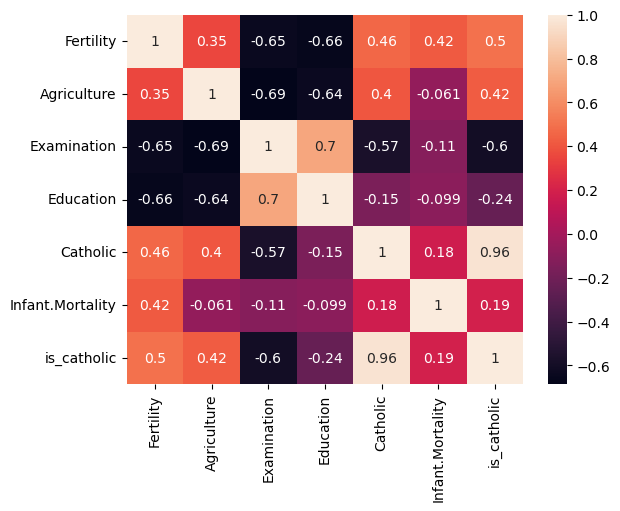

In [175]:
# What measure correlates most strongly with fertility?

sns.heatmap(swiss.corr(), annot=True)

print('Catholic has the highest correlation.')

## 'chipotle' from SQL

In [227]:
import env

url = env.db_url('chipotle')

sql = 'SELECT * FROM orders'

chip = pd.read_sql(sql, url)

#Clean item_price
chip['item_price'] = chip['item_price'].str.replace('$', '').astype(float)

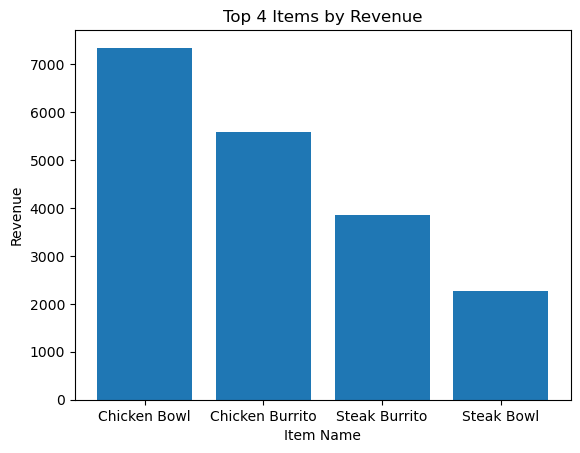

In [271]:
# Using the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

import pandas as pd
import matplotlib.pyplot as plt
import env

# Load the chipotle dataset from SQL
url = env.db_url('chipotle')
sql = 'SELECT * FROM orders'
chip = pd.read_sql(sql, url)

# Clean item_price
chip['item_price'] = chip['item_price'].str.replace('$', '').astype(float)

# Group the data by item name and sum the revenue for each item
revenue_by_item = chip.groupby('item_name')['item_price'].sum()

# Sort the items by revenue and select the top 4 items
top_items = revenue_by_item.sort_values(ascending=False).head(4)

# Create a bar chart of the top 4 items and their revenue
plt.bar(top_items.index, top_items.values)

# Add labels and title
plt.xlabel('Item Name')
plt.ylabel('Revenue')
plt.title('Top 4 Items by Revenue')

# Show the plot
plt.show()

## 'sleepstudy' from pydataset

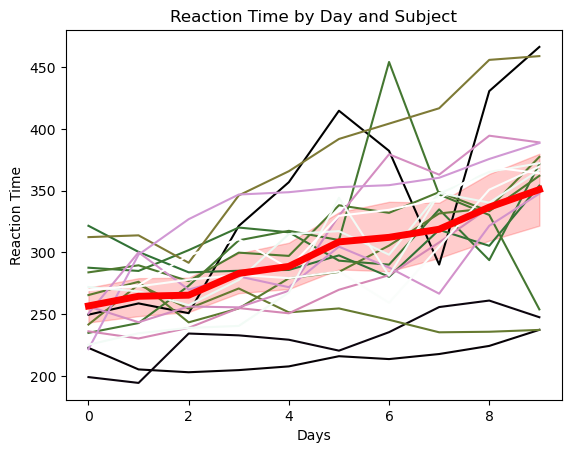

In [321]:
# Read the documentation. Use seaborn to create a line chart of all the individual subject's reaction times 
# and a more prominant line showing the average change in reaction time.

ss = data('sleepstudy')

# Create a line chart of all the individual subject's reaction times
sns.lineplot(x='Days', y='Reaction', hue='Subject', data=ss, legend=False, palette='cubehelix')

# Create a line chart of the average change in reaction time
# sns.lineplot(x='Days', y='Reaction', data=ss.groupby('Days').mean(), linewidth=5, color='r')
sns.lineplot(x='Days', y='Reaction', data=ss, linewidth=5, color='r', estimator='mean')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Reaction Time')
plt.title('Reaction Time by Day and Subject')

# Show the plot
plt.show()

# Notes

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [161]:
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
planet = sns.load_dataset('planets')

In [162]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='tip', ylabel='total_bill'>

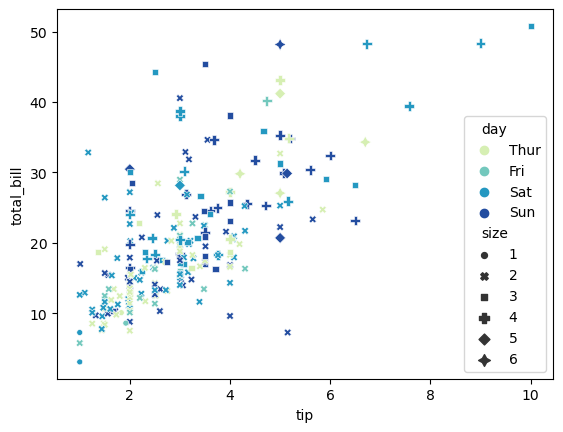

In [163]:
sns.scatterplot(x='tip', y='total_bill', data=tips, hue='day', size='size', palette='YlGnBu', style='size')

<Axes: xlabel='total_bill', ylabel='Count'>

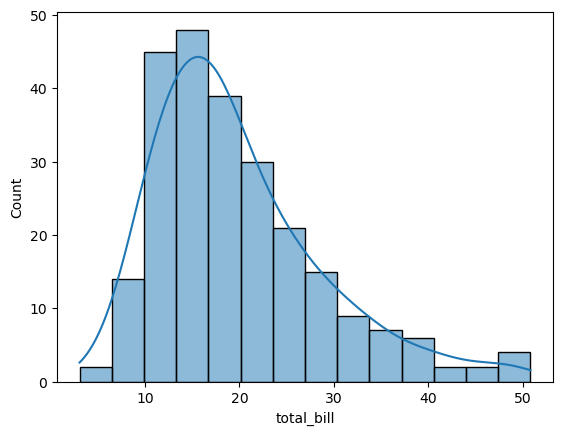

In [164]:
#Histogram good for distrobution

# Symetric, right skewed, left skewed

# In this case, left skewed

sns.histplot(tips['total_bill'], kde=True)

<Axes: xlabel='sex', ylabel='tip'>

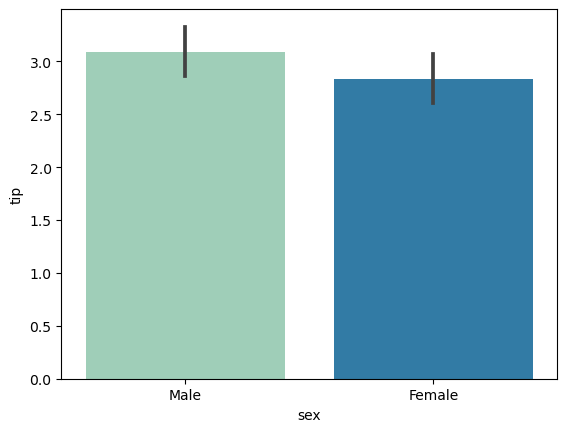

In [165]:
sns.barplot(x='sex', y='tip', data=tips, palette='YlGnBu')

<Axes: xlabel='day', ylabel='tip'>

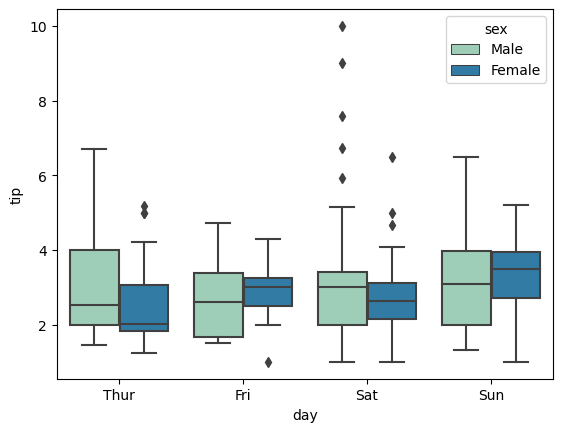

In [166]:
sns.boxplot(x='day', y='tip', data=tips, hue='sex', palette='YlGnBu')

<Axes: xlabel='day', ylabel='total_bill'>

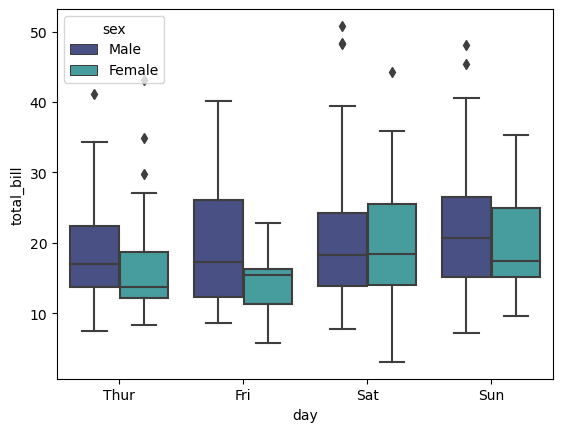

In [167]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex', palette='mako')

<Axes: xlabel='day', ylabel='tip'>

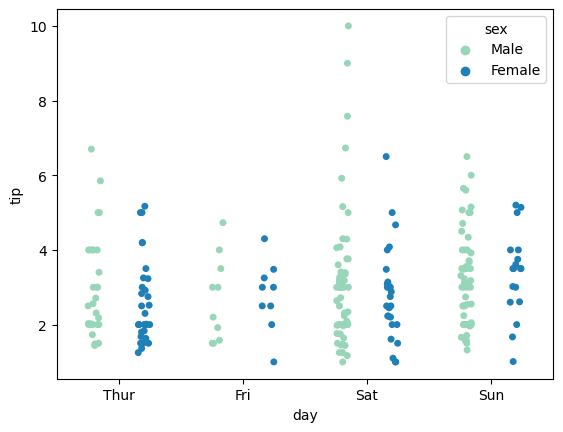

In [168]:
sns.stripplot(x='day', y='tip', data=tips, hue='sex', palette='YlGnBu', dodge=True)

<Axes: xlabel='smoker', ylabel='Count'>

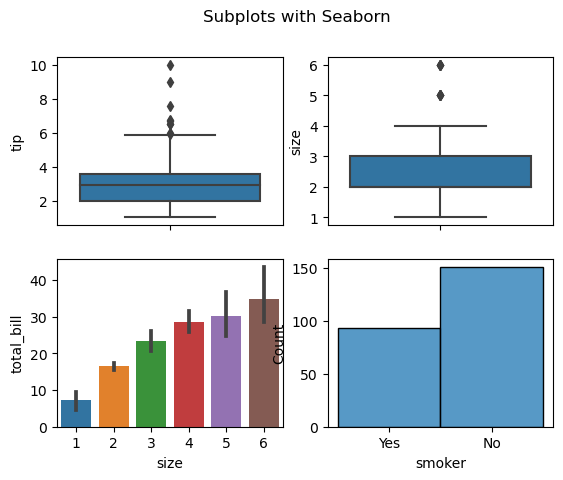

In [169]:
plt.suptitle('Subplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=tips, y='tip')

plt.subplot(222)
sns.boxplot(data=tips, y='size')

plt.subplot(223)
sns.barplot(x='size', y='total_bill', data=tips)

plt.subplot(224)
sns.histplot(tips['smoker'])

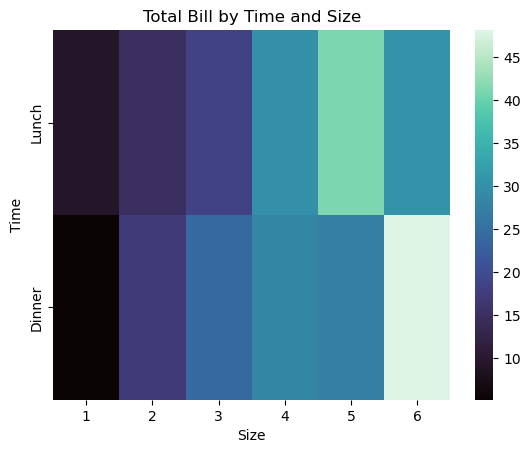

In [170]:
# Make a heatmat using tips timee vs size using tips

import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create a pivot table with the mean of the total_bill for each combination of time and size
table = tips.pivot_table(values='total_bill', index='time', columns='size', aggfunc='mean')

# Create the heatmap
sns.heatmap(table, cmap='mako')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Total Bill by Time and Size')

# Show the plot
plt.show()